<a href="https://colab.research.google.com/github/Jaya9522/almabetter_assignments/blob/main/Guided_Project_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# There are many sophisticated models people can build for solving a forecasting problem. However, they frequently stick to simple models based on average historical values, intuition and some high level domain-specific heuristics. This approach may be precise enough for the problem at hand but there are alternatives that can add more information to the prediction with a reasonable amount of additional effort.


# One approach that can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages” is a **Monte Carlo simulation**. Let's see how we can use Monte Carlo simulation methods to predict the range of potential values for a sales compensation budget.

# Problem Background


We want to predict how much money we should budget for sales commissions for the next year.

We have a defined formula for calculating commissions and we likely have some experience with prior years’ commissions payments.

This problem is important from a business perspective. Sales commissions can be a large selling expense and it is important to plan appropriately for this expense.

In this example, the sample sales commission would look like this for a 5 person sales force:

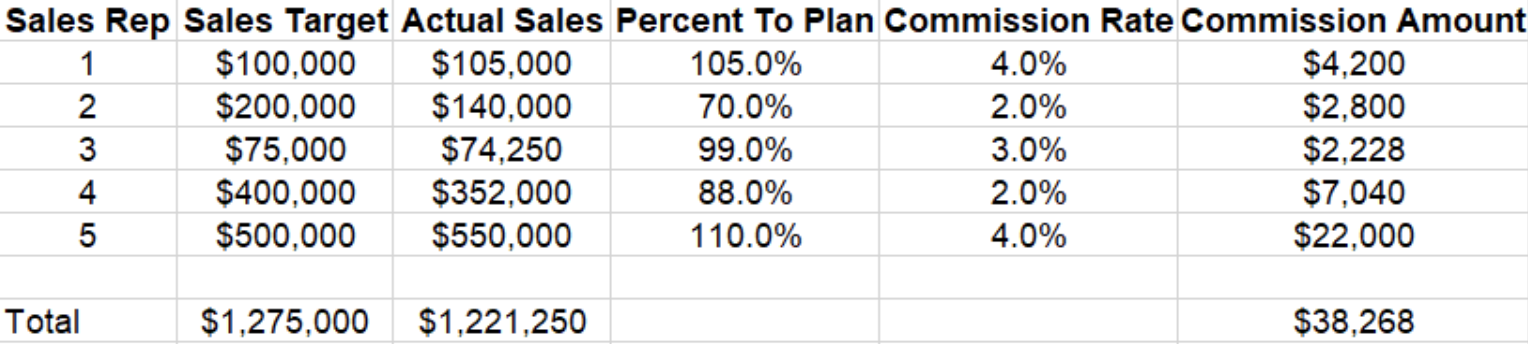

Commission Amount = Actual Sales * Commission Rate

The commission rate is based on this Percent To Plan table:

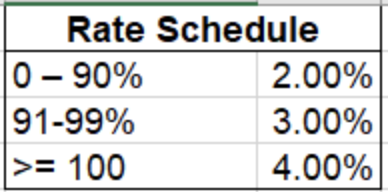

# Solution

Now that we have covered the problem at a high level, we can discuss how Monte Carlo analysis might be a useful tool for predicting commissions expenses for the next year. At its simplest level, a Monte Carlo analysis (or simulation) involves running many scenarios with different random inputs and summarizing the distribution of the results.



There are two components to running a Monte Carlo simulation:

1. the equation to evaluate
2. the random variables for the input

We have already described the equation above. Now we need to think about how to populate the random variables.

One simple approach would be to take a random number between 0% and 200% (representing our intuition about commissions rates). However, because we pay commissions every year, we understand our problem in a little more detail and can use that prior knowledge to build a more accurate model.

Because we have paid out commissions for several years, we can look at a typical historical distribution of percent to target:



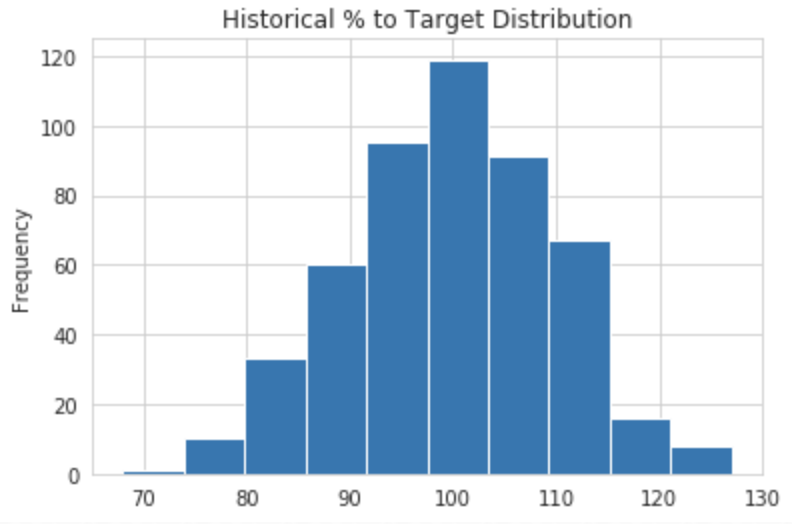

This distribution looks like a normal distribution with a mean of 100% and standard deviation of 10%. This insight is useful because we can model our input variable distribution so that it is similar to our real world experience.

Let’s define those variables as well as the number of sales reps and simulations we are modeling:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
mean = 1
std_dev = 0.1
num_reps = 500

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Percent to Target Distribution')

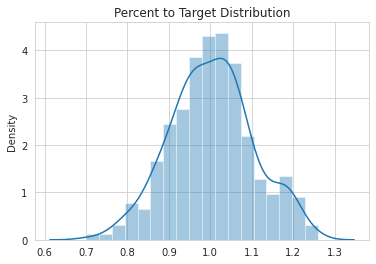

In [3]:
pct_to_target = norm.rvs(mean, std_dev, num_reps).round(2)
sns.distplot(pct_to_target).set_title('Percent to Target Distribution')

In [4]:
pct_to_target

array([0.85, 1.15, 0.93, 0.89, 1.2 , 1.02, 0.97, 1.08, 1.  , 1.04, 1.21,
       0.94, 1.08, 1.04, 0.96, 1.18, 0.84, 1.04, 1.16, 0.93, 1.09, 0.89,
       1.16, 1.04, 0.99, 0.8 , 0.98, 0.97, 1.18, 0.95, 0.94, 1.18, 0.91,
       1.05, 0.92, 0.93, 1.1 , 1.02, 0.91, 1.2 , 1.05, 0.99, 0.84, 1.09,
       1.18, 0.97, 1.02, 1.02, 1.01, 0.99, 1.15, 1.01, 0.96, 1.11, 0.87,
       1.01, 0.99, 1.07, 1.02, 0.97, 0.96, 1.18, 1.11, 1.11, 0.86, 0.96,
       0.86, 0.93, 0.9 , 1.  , 1.02, 0.95, 0.98, 0.92, 0.98, 1.03, 0.92,
       0.96, 0.82, 1.2 , 1.  , 1.04, 1.  , 1.26, 1.05, 0.89, 1.08, 1.13,
       1.12, 0.93, 1.02, 1.02, 0.86, 1.04, 1.11, 1.02, 1.05, 1.1 , 1.19,
       0.98, 1.04, 0.89, 0.94, 1.  , 0.84, 1.17, 1.09, 0.95, 0.96, 1.09,
       1.18, 0.86, 1.04, 1.06, 0.96, 1.21, 1.01, 0.99, 0.98, 1.2 , 1.06,
       0.95, 1.  , 1.17, 1.  , 0.92, 1.18, 0.98, 0.95, 1.03, 1.17, 0.76,
       0.97, 0.95, 1.12, 0.99, 0.95, 1.12, 0.91, 1.2 , 0.96, 0.95, 1.19,
       1.08, 1.04, 1.07, 0.94, 1.03, 1.03, 1.  , 0.

In [6]:
# Given r, get x such that P(X<x) = r = > ppf => inverse of CDF

cdfs = uniform.rvs(0, 1, num_reps)
pct_to_target = norm.ppf(cdfs, mean, std_dev)
pct_to_target

array([1.04479493, 1.03565316, 0.92186457, 0.87562912, 1.00962342,
       1.23993967, 0.98832491, 1.00952106, 0.985174  , 0.98550217,
       1.09337547, 0.97747761, 0.97734436, 0.97150724, 0.97822266,
       1.00628643, 0.9611023 , 0.93800024, 1.06566339, 0.97553222,
       1.01931803, 0.98870117, 1.00731809, 1.09539341, 1.31370665,
       0.97941195, 1.09038787, 0.93349201, 0.9812075 , 1.10796882,
       0.96473651, 0.99297018, 0.90232962, 0.92781906, 1.05936555,
       1.02415235, 0.99857117, 0.6876557 , 0.75378642, 1.0459251 ,
       0.9241199 , 1.16736825, 1.05476994, 1.04807687, 0.95746827,
       0.8489404 , 1.12297057, 0.94950242, 1.03143133, 1.04237149,
       1.0530691 , 1.09795962, 1.03258107, 1.04096296, 0.87151795,
       0.85112977, 0.87773876, 0.97527568, 1.09644306, 0.8896443 ,
       0.94371554, 1.06694969, 1.18446825, 0.97427517, 1.06377097,
       0.99926139, 1.00062395, 0.96452782, 0.92387935, 0.92845519,
       0.99116965, 0.94325366, 1.04050736, 0.97306238, 0.97966

There is one other value that we need to simulate and that is the actual sales target. We know from history that our sales target distribution looks something like this:

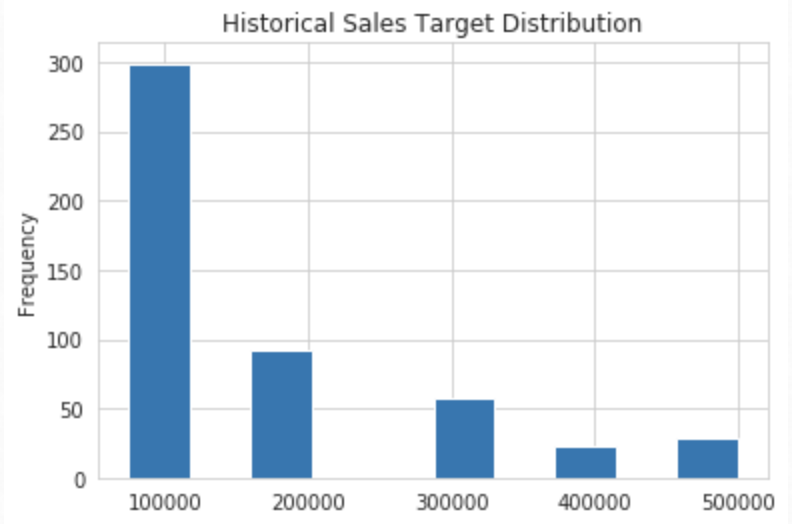

This is definitely not a normal distribution. This distribution shows us that sales targets are set into 1 of 6 buckets and the frequency gets lower as the amount increases. This distribution could be indicative of a very simple target setting process where individuals are bucketed into certain groups and given targets consistently based on their tenure, territory size or sales pipeline.

In [7]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [8]:
sales_target

array([200000, 100000, 100000, 400000, 100000, 200000,  75000, 100000,
       200000, 500000,  75000, 100000, 200000, 100000,  75000, 100000,
        75000, 100000,  75000, 100000, 100000, 500000, 100000, 200000,
       200000,  75000, 100000, 100000,  75000, 100000,  75000,  75000,
        75000, 200000, 200000, 400000,  75000, 100000,  75000, 300000,
       200000,  75000, 100000, 100000, 100000, 300000, 300000, 200000,
       100000, 200000, 100000,  75000, 100000,  75000, 200000, 300000,
        75000, 100000, 200000, 100000, 100000,  75000, 100000, 200000,
       100000, 300000,  75000, 200000, 100000, 100000, 200000, 200000,
       200000,  75000, 100000, 100000,  75000,  75000, 200000, 500000,
       300000,  75000,  75000,  75000, 100000, 100000, 100000, 400000,
       100000, 200000, 100000, 200000, 200000, 200000, 500000,  75000,
        75000, 100000, 100000, 300000, 300000, 200000,  75000,  75000,
        75000,  75000,  75000,  75000, 100000, 400000, 300000, 100000,
      

In [11]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

# Calculate sales
df['Sales'] = df[ 'Pct_To_Target' ] * df['Sales_Target']

In [12]:
df.head()

,Pct_To_Target,Sales_Target,Sales
0,1.044795,200000,208958.986844
1,1.035653,100000,103565.316135
2,0.921865,100000,92186.456974
3,0.875629,400000,350251.647687
4,1.009623,100000,100962.341520


In [13]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    # Your code here
    if x <= .90:
       return .02
    if x <= .99:
       return .03
    else:
       return .04      
    

In [18]:
# Your code here 
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [19]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,1.044795,200000,208958.986844,0.04,8358.359474
1,1.035653,100000,103565.316135,0.04,4142.612645
2,0.921865,100000,92186.456974,0.03,2765.593709
3,0.875629,400000,350251.647687,0.02,7005.032954
4,1.009623,100000,100962.341520,0.04,4038.493661


In [20]:
df['Commission_Amount'].sum()

2825713.3061531065

In [21]:
df['Sales'].sum()

81742285.6295394

In [22]:
df['Sales_Target'].sum()

81675000

# Let’s Loop

The real “magic” of the Monte Carlo simulation is that if we run a simulation many times, we start to develop a picture of the likely distribution of results.

In [23]:
num_simulations = 1000

# Define a dataframe to keep all the results from each simulation that we want to analyze
results_df = pd.DataFrame()

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target= np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target= norm.rvs(mean, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df[ 'Pct_To_Target' ] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    results_df= results_df.append(pd.DataFrame({'Sales':[df['Sales'].sum().round(0)],
                                    'Commission_Amount':[df['Commission_Amount'].sum().round(0)],
                                    'Sales_Target':[df['Sales_Target'].sum().round(0)]}), ignore_index=True)

In [24]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,745,372.25","2,857,295.757","83,773,350.0"
std,"2,664,359.6211253316","101,142.74473590612","2,613,763.62507932"
min,"76,805,250.0","2,561,868.0","76,175,000.0"
25%,"81,779,812.5","2,784,601.25","81,875,000.0"
50%,"83,692,875.0","2,853,558.5","83,675,000.0"
75%,"85,624,062.5","2,926,707.75","85,525,000.0"
max,"92,869,000.0","3,182,372.0","92,775,000.0"


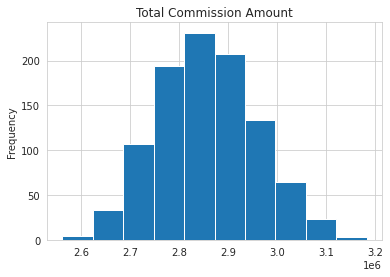

In [25]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")